# **Goal**

**NOTE** This notebook is *slightly different* with the actual code.

This code is assigmnent to complete IDcamp 2023 in intermediete stage for machine learning path. The goal is to classify text into 3 classes, positive, neutral, and negative review. The dataset used about Amazon Reviews Datasets from kaggle.

# **Profile**
www.dicoding.com/users/firmansyahrizal/


# **Hubungkan dengan Google Drive**



1.   Mount your Google Drive
2.   Create a folder in Google Drive (untuk menyimpan pada folder tertentu)



In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Persiapkan Dataframe**



1.   Transform dataets into **dataframe**
2.   Because the data is categorical, first **one-hot-encoding** the data



In [ ]:
# transform dataset menjadi dataframe

import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Files/Dicoding/00-NLP/cleaned_reviews AMZ.csv')

# Lihat bentuk data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17340 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17340 non-null  int64  
 3   review_score           17340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 542.0+ KB


In [ ]:
# know our dataset!
df

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0
...,...,...,...,...
17335,positive,i love this speaker and love can take it anywh...,30,5.0
17336,positive,i use it in my house easy to connect and loud ...,13,4.0
17337,positive,the bass is good and the battery is amazing mu...,41,5.0
17338,positive,love it,2,5.0


In [ ]:
# we just use 2 columns "sentiments" and "cleaned_review" column, so drop the other column
df = df.drop(columns=['cleaned_review_length', 'review_score'])
df

,sentiments,cleaned_review
0,positive,i wish would have gotten one earlier love it a...
1,neutral,i ve learned this lesson again open the packag...
2,neutral,it is so slow and lags find better option
3,neutral,roller ball stopped working within months of m...
4,neutral,i like the color and size but it few days out ...
...,...,...
17335,positive,i love this speaker and love can take it anywh...
17336,positive,i use it in my house easy to connect and loud ...
17337,positive,the bass is good and the battery is amazing mu...
17338,positive,love it


In [ ]:
# one-hot-encoding

category = pd.get_dummies(df.sentiments)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='sentiments')
df_baru

,cleaned_review,negative,neutral,positive
0,i wish would have gotten one earlier love it a...,0,0,1
1,i ve learned this lesson again open the packag...,0,1,0
2,it is so slow and lags find better option,0,1,0
3,roller ball stopped working within months of m...,0,1,0
4,i like the color and size but it few days out ...,0,1,0
...,...,...,...,...
17335,i love this speaker and love can take it anywh...,0,0,1
17336,i use it in my house easy to connect and loud ...,0,0,1
17337,the bass is good and the battery is amazing mu...,0,0,1
17338,love it,0,0,1


In [ ]:
# how many unique words, will be usefull for  and maxlen

# count unique words
unique_word_count = len(df['cleaned_review'].unique())
print(f"Number of unique words in data column: {unique_word_count}")
# digunakan untuk menentukan num_word

# hitung rata-rata kata disetiap row
# Apply str.split to each row to get a list of words
df['word_count'] = df['cleaned_review'].str.split().str.len()

# Hitung rata-rata banyak kata tiap baris
average_word_count = df['word_count'].mean()
print(f"Average number of words per row: {average_word_count}")
# digunakan untuk menetukan maxlen

Number of unique words in data column: 13194
Average number of words per row: 30.305704562496395


In [ ]:
# transform the dataframe into numpy array

pesan = df_baru['cleaned_review'].values
label = df_baru[['negative', 'positive', 'neutral']].values

In [ ]:
# split the train and test dataset

from sklearn.model_selection import train_test_split
pesan_latih, pesan_test, label_latih, label_test = train_test_split(pesan, label, test_size=0.2)

In [ ]:
# ubah data jadi float, baru ada untuk data AMAZON

pesan_latih = [str(item) for item in pesan_latih]
pesan_test = [str(item) for item in pesan_test]

In [ ]:
# buat sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# num_words 5000 - 50000, remember that the datasets just only 13.194 unique words
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(pesan_latih)
#tokenizer.fit_on_texts(pesan_test) .ft hanya dilakukan pada train datasets saja

max_seq=55 # rata-rata panjang kalimat, meskipun rata-rata jumlah kata 30, tetapi cari nilai yang lebih merepresentasikan dataset
sekuens_latih = tokenizer.texts_to_sequences(pesan_latih)
sekuens_test = tokenizer.texts_to_sequences(pesan_test)

padded_latih = pad_sequences(sekuens_latih,
                             padding='post',
                             maxlen=max_seq,
                             truncating='post')
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                            maxlen=max_seq,
                            truncating='post')

# **Build and Train the Model**

Dikarenakan untuk tujuan referensi dikemudian hari, beberapa layer/ perintah hanya dimatikan menggunakan #

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM

# menggunakan callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/best_model.h5', save_weights_only=True, save_freq='epoch')
learning_rate_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

jml_kata = len(tokenizer.word_index) + 1
dimensi_embedding = 256 # mulai 128, 256, ...
# buat model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=jml_kata, output_dim=dimensi_embedding, input_length=max_seq),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Bidirectional(LSTM(16, return_sequences=True, dropout=0.3)),
    #tf.keras.layers.LSTM(16, return_sequences=True, dropout=0.5),
    #tf.keras.layers.LSTM(16, dropout=0.3),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])

#compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
num_epochs = 55
catatan = model.fit(padded_latih, label_latih,
                    epochs=num_epochs,
                    batch_size=32,
                    validation_data=(padded_test, label_test),
                    callbacks=[model_checkpoint, learning_rate_scheduler],
                    verbose=2)

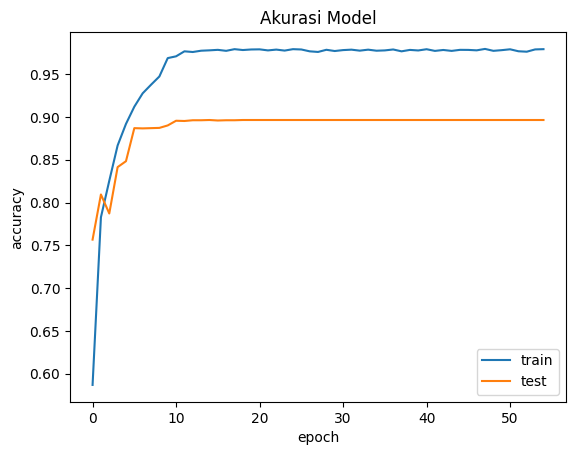

In [ ]:
# plot akurasi

import matplotlib.pyplot as plt
plt.plot(catatan.history['accuracy'])
plt.plot(catatan.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

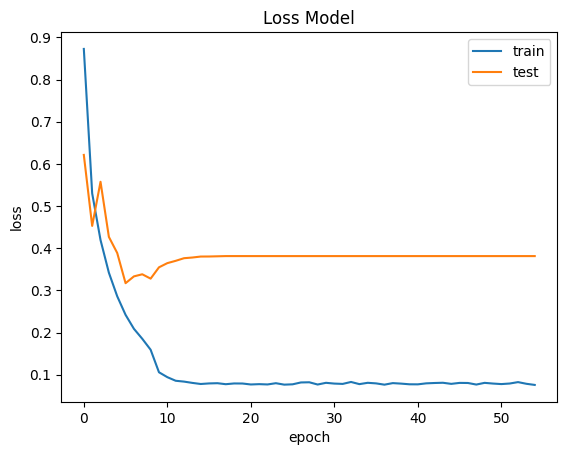

In [ ]:
# plot loss

plt.plot(catatan.history['loss'])
plt.plot(catatan.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()